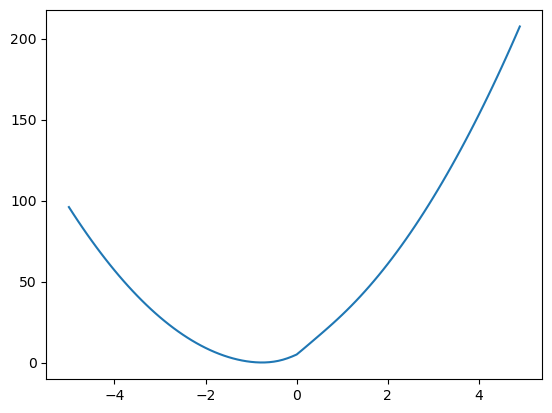

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

def sigmoid(x):
    function_value = 1/(1+np.exp(-x))
    return function_value

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)


def F(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3 ):
    return alpha1*sigmoid(teta1*x) + alpha2*tanh(teta2*x) + alpha3*relu(teta3*x) + alpha4*x**2 + alpha5*x + alpha6

xx = np.arange(-5, 5, 0.1)
yy = []
for i in xx:
    yy.append(F(i , 2 , 3 , 4 , 5 , 6 , 4 , 1.5 , 2 , 2.5 ))
yy = np.array(yy)

xx = xx.reshape((xx.shape[0],1))
yy = yy.reshape((yy.shape[0],1))

data = np.concatenate((xx, yy), axis=1)

df = pd.DataFrame(data)
df.to_csv('data.csv' , index=False)

plt.plot(data[:,0],data[:,1])


In [7]:
X , Y = data[:,0] , data[:,1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

[0.1143276  0.26793386 0.2679487  0.03859479 0.32482838 0.55705374
 0.98424574 0.80198404 0.24935253]
MSE:  3.7792295408410688


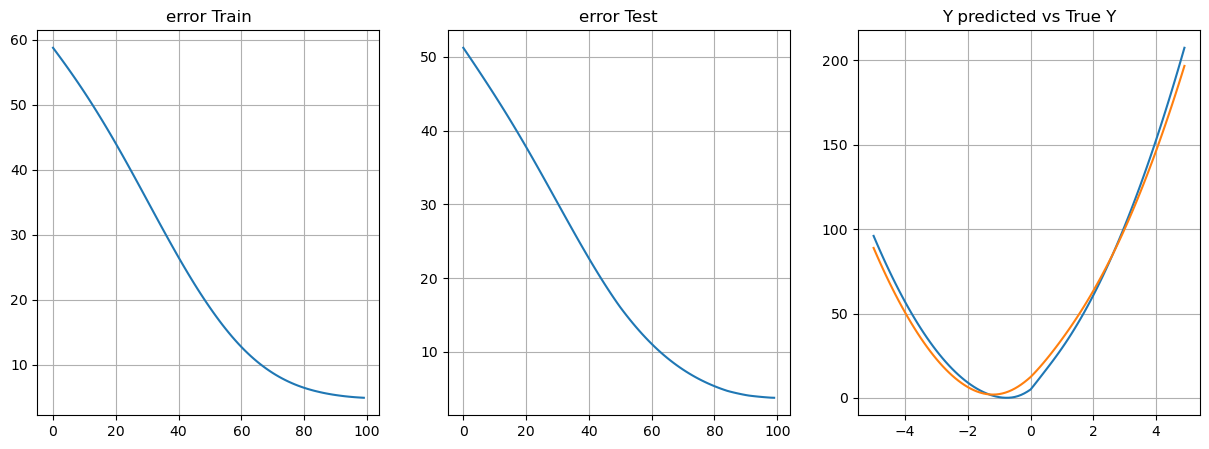

In [120]:
initial_parameters = np.random.rand(9)
print(initial_parameters)
errors_train = []
errors_test = []
        
    
def update_parameters_alpha():
    eta = 0.000001
    for epoch in range(100):

        error1 = 0
        for i in range(x_train.shape[0]):
            
            erorr = y_train[i] - F(x_train[i] , *initial_parameters)
            initial_parameters[0] -= -1 * eta * erorr  * F(x_train[i], alpha1=1, alpha2=initial_parameters[1], alpha3=initial_parameters[2], alpha4=initial_parameters[3], alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[1] -= -1 * eta * erorr  * F(x_train[i], alpha1=initial_parameters[0], alpha2=1, alpha3=initial_parameters[2], alpha4=initial_parameters[3], alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[2] -= -1 * eta * erorr  * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=1 , alpha4=initial_parameters[3], alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])        
    
            initial_parameters[3] -= -1 * eta * erorr * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=initial_parameters[2] , alpha4=1 , alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[4] -= -1 * eta * erorr * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=initial_parameters[2] , alpha4=initial_parameters[3] , alpha5=1, alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])        
            
            initial_parameters[5] -= -1 * eta * erorr * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=initial_parameters[2] , alpha4=initial_parameters[3] , alpha5=initial_parameters[4], alpha6=1, teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            error1 += abs(erorr)
        
        error2 = 0
        for i in range(x_test.shape[0]):
            erorr_test = y_test[i] - F(x_test[i] , *initial_parameters)
            error2 += abs(erorr_test)
        errors_test.append(error2 / x_test.shape[0])
            
        errors_train.append(error1 / x_train.shape[0])
        
update_parameters_alpha()

fig , ax = plt.subplots(1 , 3 , figsize = (15,5))
plt.plot(data[:,0],data[:,1])
y_predicted = F(X,*initial_parameters)


ax[0].plot(errors_train)
ax[0].grid(True)
ax[0].set_title('error Train')

ax[1].plot(errors_test)
ax[1].grid(True)
ax[1].set_title('error Test')

ax[2].plot(data[:,0] , y_predicted)
ax[2].grid(True)
ax[2].set_title('Y predicted vs True Y')

print('MSE: ' , errors_test[-1])

[0.18294245 0.50508319 0.99388317 0.9049768  0.26744284 0.33191456
 0.13431485 0.32483429 0.37274908]
[4.19018994 4.62105346 4.67507105 2.86102986 4.63628067 4.23212531
 4.10760458 4.45284502 4.17489037]
MSE:  13.81530745887017


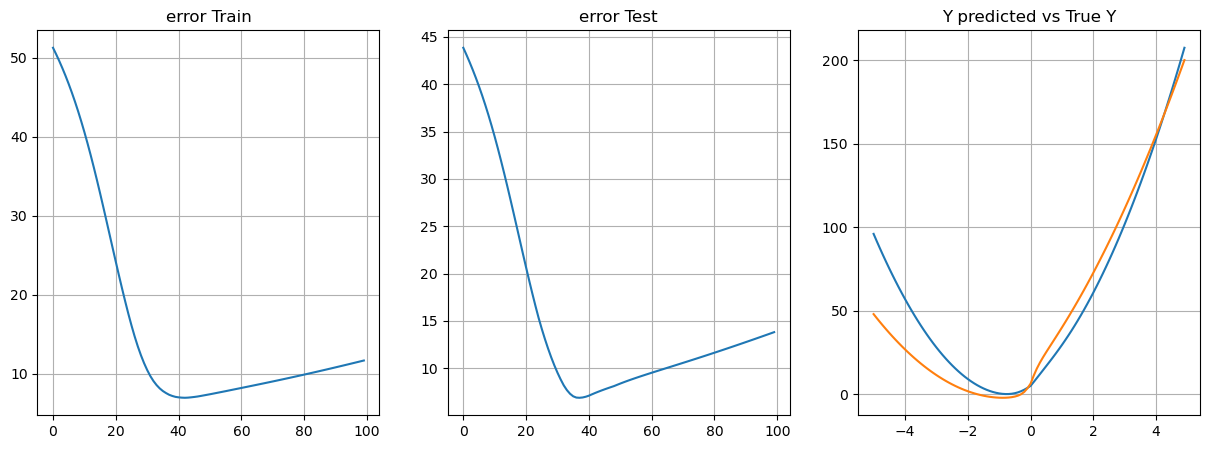

In [128]:
initial_parameters = np.random.rand(9)
print(initial_parameters)
errors_train = []
errors_test = []

def f_derivation_sig(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3):
    return alpha1*x*(1-sigmoid(teta1*x))*sigmoid(teta1*x) + alpha2*tanh(teta2*x) + alpha3*relu(teta3*x) + alpha4*x**2 + alpha5*x + alpha6

def f_derivation_tanh(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3):
    return alpha1*sigmoid(teta1*x) + x*alpha2*(1-tanh(teta2*x)**2) + alpha3*relu(teta3*x) + alpha4*x**2 + alpha5*x + alpha6

def f_derivation_relu(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3):
    return alpha1*sigmoid(teta1*x) + alpha2*tanh(teta2*x) + x*alpha3*np.where(x > 0 , 1 , 0) + alpha4*x**2 + alpha5*x + alpha6

    

def F(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3):
    return alpha1*sigmoid(teta1*x) + alpha2*tanh(teta2*x) + alpha3*relu(teta3*x) + alpha4*x**2 + alpha5*x + alpha6
    
    
def update_parameters_all():
    eta = 0.000001
    for epoch in range(100):

        error1 = 0
        for i in range(x_train.shape[0]):
            
            erorr = y_train[i] - F(x_train[i] , *initial_parameters)
            initial_parameters[0] -= -1 * eta * erorr  * F(x_train[i], alpha1=1, alpha2=initial_parameters[1], alpha3=initial_parameters[2], alpha4=initial_parameters[3], alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[1] -= -1 * eta * erorr  * F(x_train[i], alpha1=initial_parameters[0], alpha2=1, alpha3=initial_parameters[2], alpha4=initial_parameters[3], alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[2] -= -1 * eta * erorr  * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=1 , alpha4=initial_parameters[3], alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])        
    
            initial_parameters[3] -= -1 * eta * erorr * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=initial_parameters[2] , alpha4=1 , alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[4] -= -1 * eta * erorr * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=initial_parameters[2] , alpha4=initial_parameters[3] , alpha5=1, alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])        
            
            initial_parameters[5] -= -1 * eta * erorr * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=initial_parameters[2] , alpha4=initial_parameters[3] , alpha5=initial_parameters[4], alpha6=1, teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[6] -= -1 * eta * erorr * f_derivation_sig(x_train[i] , *initial_parameters)
            
            initial_parameters[7] -= -1 * eta * erorr * f_derivation_tanh(x_train[i] , *initial_parameters)
            
            initial_parameters[8] -= -1 * eta * erorr * f_derivation_relu(x_train[i] , *initial_parameters)
            
            
            
            error1 += abs(erorr)
        
        error2 = 0
        for i in range(x_test.shape[0]):
            erorr_test = y_test[i] - F(x_test[i] , *initial_parameters)
            error2 += abs(erorr_test)
        errors_test.append(error2 / x_test.shape[0])
            
        errors_train.append(error1 / x_train.shape[0])
        
update_parameters_all()
print(initial_parameters)

fig , ax = plt.subplots(1 , 3 , figsize = (15,5))
plt.plot(data[:,0],data[:,1])
y_predicted = F(X,*initial_parameters)


ax[0].plot(errors_train)
ax[0].grid(True)
ax[0].set_title('error Train')

ax[1].plot(errors_test)
ax[1].grid(True)
ax[1].set_title('error Test')

ax[2].plot(data[:,0] , y_predicted)
ax[2].grid(True)
ax[2].set_title('Y predicted vs True Y')

print('MSE: ' , errors_test[-1])

[0.82329496 0.89097062 0.98587211 0.85922964 0.36459817 0.63467669
 0.69879331 0.92769967 0.60226974]
[ 0.82329496  0.89097062  0.98587211  0.85922964  0.36459817  0.63467669
 88.34634644 89.26029796 33.42741616]
MSE:  17.31323251522124


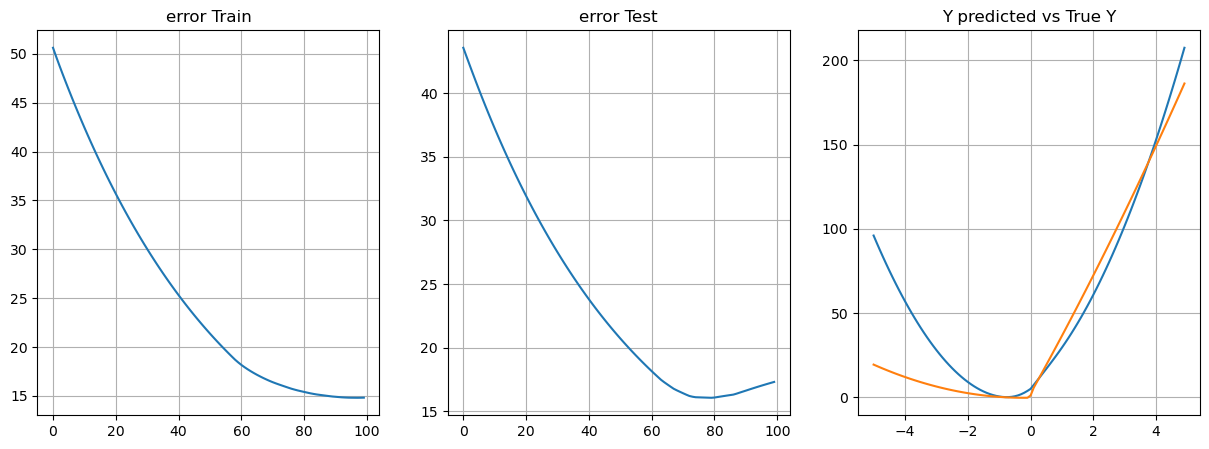

In [145]:
initial_parameters = np.random.rand(9)
print(initial_parameters)
errors_train = []
errors_test = []

    

def F(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3):
    return alpha1*sigmoid(teta1*x) + alpha2*tanh(teta2*x) + alpha3*relu(teta3*x) + alpha4*x**2 + alpha5*x + alpha6
    
    
def update_parameters_teta():
    eta = 0.00001
    for epoch in range(100):

        error1 = 0
        for i in range(x_train.shape[0]):
            
            erorr = y_train[i] - F(x_train[i] , *initial_parameters)
            
            initial_parameters[6] -= -1 * eta * erorr * f_derivation_sig(x_train[i] , *initial_parameters)
            
            initial_parameters[7] -= -1 * eta * erorr * f_derivation_tanh(x_train[i] , *initial_parameters)
            
            initial_parameters[8] -= -1 * eta * erorr * f_derivation_relu(x_train[i] , *initial_parameters)
            
            
            
            error1 += abs(erorr)
        
        error2 = 0
        for i in range(x_test.shape[0]):
            erorr_test = y_test[i] - F(x_test[i] , *initial_parameters)
            error2 += abs(erorr_test)
        errors_test.append(error2 / x_test.shape[0])
            
        errors_train.append(error1 / x_train.shape[0])
        
update_parameters_teta()
print(initial_parameters)

fig , ax = plt.subplots(1 , 3 , figsize = (15,5))
plt.plot(data[:,0],data[:,1])
y_predicted = F(X,*initial_parameters)


ax[0].plot(errors_train)
ax[0].grid(True)
ax[0].set_title('error Train')

ax[1].plot(errors_test)
ax[1].grid(True)
ax[1].set_title('error Test')

ax[2].plot(data[:,0] , y_predicted)
ax[2].grid(True)
ax[2].set_title('Y predicted vs True Y')

print('MSE: ' , errors_test[-1])